In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb

https://forecastegy.com/posts/xgboost-binary-classification-python/

In [2]:
# Load the data
#data = pd.read_csv('D:/!!Research/rgee_test/GEE_LPC/point_data/env_data_all_poly.csv')
data = pd.read_csv('C:/Users/Justin Dawsey/Documents/GitHub/GEE_LPC/point_data/env_data_all_poly.csv')

# Display the first few rows of the data
data.head()

GrndTruth    bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200  \
0          0  1.381875  1.387673  1.391175  1.412846   1.450293    1.436478   
1          0  1.468198  1.493448  1.502102  1.490920   1.487852    1.530254   
2          0  1.468198  1.493448  1.502102  1.490920   1.487852    1.530254   
3          0  1.468198  1.493448  1.502102  1.490920   1.487852    1.530254   
4          0  1.468198  1.493448  1.502102  1.490920   1.487852    1.530254   

    clay_0_5  clay_5_15  clay_15_30  ...    kw_025    resdept  soil_depth  \
0  21.131218  22.248047   25.274633  ...  0.269307  71.531555  204.043747   
1  12.523438  12.517578   14.886719  ...  0.245076  56.675571  205.172592   
2  12.523438  12.517578   14.886719  ...  0.245481  59.141796  203.565475   
3  12.523438  12.517578   14.886719  ...  0.258702  58.169685  206.974319   
4  12.523438  12.517578   14.886719  ...  0.246111  56.164371  203.378952   

   wind_erodibility_index    rf_025  water_storage       bio12       bio07  \
0               66.303207  0.001015      25.616442  420.859833  384.467072   
1               85.919785  0.000263      26.720432  418.933075  384.077240   
2               82.631371  0.000460      26.433264  418.951141  383.294006   
3               84.635284  0.000948      26.282341  419.616150  384.000000   
4               86.948471  0.000464      26.305265  418.332672  383.988769   

    dist_drain   dist_road  
0  2510.766432  296.210965  
1  4032.639783   38.345230  
2  4721.268141  227.940177  
3  2235.246120  330.755369  
4  8219.909063    9.410144  

[5 rows x 69 columns]

In [4]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = data.drop('GrndTruth', axis=1)
y = data['GrndTruth']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42) #test size orginally 0.3

https://www.youtube.com/watch?v=GrJP9FLV3FE

https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-using-xgboost

https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27 \
https://notebook.community/slundberg/shap/notebooks/tree_explainer/Census%20income%20classification%20with%20XGBoost

In [5]:
from xgboost import XGBClassifier
stq_model = XGBClassifier(objective='binary:logistic', seed = 42)
stq_model.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.50384
[1]	validation_0-logloss:0.47796
[2]	validation_0-logloss:0.45613
[3]	validation_0-logloss:0.43896
[4]	validation_0-logloss:0.42652
[5]	validation_0-logloss:0.41347
[6]	validation_0-logloss:0.40543
[7]	validation_0-logloss:0.39862
[8]	validation_0-logloss:0.39590
[9]	validation_0-logloss:0.39019
[10]	validation_0-logloss:0.38874
[11]	validation_0-logloss:0.38521
[12]	validation_0-logloss:0.38419
[13]	validation_0-logloss:0.38348
[14]	validation_0-logloss:0.38555
[15]	validation_0-logloss:0.38550
[16]	validation_0-logloss:0.38273
[17]	validation_0-logloss:0.38176
[18]	validation_0-logloss:0.38346
[19]	validation_0-logloss:0.38616
[20]	validation_0-logloss:0.38982
[21]	validation_0-logloss:0.39259
[22]	validation_0-logloss:0.39379
[23]	validation_0-logloss:0.39620
[24]	validation_0-logloss:0.39663
[25]	validation_0-logloss:0.39720
[26]	validation_0-logloss:0.39841
[27]	validation_0-logloss:0.39839


C:\Users\Justin Dawsey\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Justin Dawsey\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

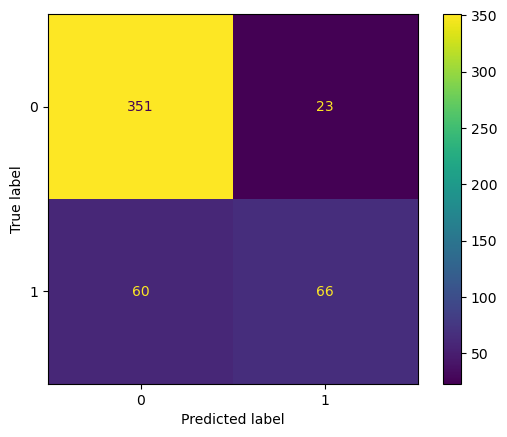

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model, X_test, y_test)

In [7]:
"""from sklearn.model_selection import GridSearchCV
param_grid_1 = {
    "max_depth" : [3, 4, 5],
    "learning_rate" : [0.1, 0.01, 0.05],
    "gamma" : [0, 0.25, 1.0],
    "reg_lambda" : [0, 1.0, 10],
    "scale_pos_weight" : [1, 3, 5],
    "eta": [0.01, 0.05, 0.1]
}"""
""" # the original
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.5, 1],
    "gamma" : [1, 5, 10],
    "reg_lambda" : [10, 20, 50],
    "scale_pos_weight" : [3],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}
"""
"""
# the new one to test
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.01, 0.001],
    "gamma" : [1, 5, 10],
    "reg_lambda" : [10, 20, 50],
    "scale_pos_weight" : [2.95],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
} """
"""
optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic',
                             seed = 42,
                             subsample = 0.7,
                             colsample_bytree = 0.5),
    param_grid = param_grid_2,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, y_train, verbose = False, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(X_test, y_test)])
print(optimal_params.best_params_)"""

"\noptimal_params = GridSearchCV(\n    estimator = XGBClassifier(objective = 'binary:logistic',\n                             seed = 42,\n                             subsample = 0.7,\n                             colsample_bytree = 0.5),\n    param_grid = param_grid_2,\n    scoring = 'roc_auc',\n    verbose = 0,\n    n_jobs = 10,\n    cv = 3\n)\n\noptimal_params.fit(X_train, y_train, verbose = False, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(X_test, y_test)])\nprint(optimal_params.best_params_)"

In [8]:
#compare to xgboost_env_test notebook
#https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c
stq_model_2 = XGBClassifier(objective='binary:logistic', 
                            seed = 42, 
                            max_depth = 7, # how deep the tree will go -- originally 4
                            learning_rate = 0.1, # also known as eta
                            gamma = 1, # originally 0.25
                            reg_lambda = 20, # was set to 1
                            scale_pos_weight = 2.95, #sum(negative instances) / sum(positive instances) - was set to 5 originally
                            subsample = 0.7,) # was set to .5 initially. Should be 0.5 or greater
                            #base_score = np.mean(y_train))
stq_model_2.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.66846
[1]	validation_0-logloss:0.64897
[2]	validation_0-logloss:0.63187
[3]	validation_0-logloss:0.61554
[4]	validation_0-logloss:0.60012
[5]	validation_0-logloss:0.58514
[6]	validation_0-logloss:0.57477
[7]	validation_0-logloss:0.56359
[8]	validation_0-logloss:0.55273
[9]	validation_0-logloss:0.54494
[10]	validation_0-logloss:0.53342
[11]	validation_0-logloss:0.52372
[12]	validation_0-logloss:0.51746
[13]	validation_0-logloss:0.50937
[14]	validation_0-logloss:0.50372
[15]	validation_0-logloss:0.49721
[16]	validation_0-logloss:0.49223
[17]	validation_0-logloss:0.48530
[18]	validation_0-logloss:0.48039
[19]	validation_0-logloss:0.47742
[20]	validation_0-logloss:0.47217
[21]	validation_0-logloss:0.46975
[22]	validation_0-logloss:0.46695
[23]	validation_0-logloss:0.45986
[24]	validation_0-logloss:0.45761
[25]	validation_0-logloss:0.45329


C:\Users\Justin Dawsey\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Justin Dawsey\miniconda3\envs\gee_stats\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-logloss:0.45073
[27]	validation_0-logloss:0.44753
[28]	validation_0-logloss:0.44725
[29]	validation_0-logloss:0.44443
[30]	validation_0-logloss:0.44231
[31]	validation_0-logloss:0.44116
[32]	validation_0-logloss:0.43913
[33]	validation_0-logloss:0.43751
[34]	validation_0-logloss:0.43568
[35]	validation_0-logloss:0.43434
[36]	validation_0-logloss:0.43331
[37]	validation_0-logloss:0.43205
[38]	validation_0-logloss:0.43087
[39]	validation_0-logloss:0.42828
[40]	validation_0-logloss:0.42647
[41]	validation_0-logloss:0.42412
[42]	validation_0-logloss:0.42290
[43]	validation_0-logloss:0.42119
[44]	validation_0-logloss:0.42062
[45]	validation_0-logloss:0.41967
[46]	validation_0-logloss:0.41968
[47]	validation_0-logloss:0.41805
[48]	validation_0-logloss:0.41692
[49]	validation_0-logloss:0.41513
[50]	validation_0-logloss:0.41543
[51]	validation_0-logloss:0.41503
[52]	validation_0-logloss:0.41323
[53]	validation_0-logloss:0.41292
[54]	validation_0-logloss:0.41196
[55]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

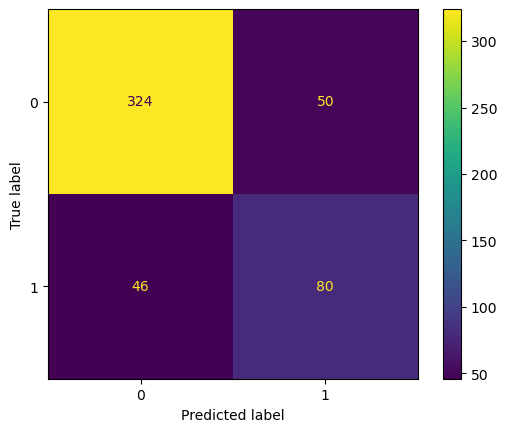

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model_2, X_test, y_test)

In [10]:
# Calculate accuracy
accuracy = stq_model_2.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.80%


In [11]:
y_pred = stq_model_2.predict(X_test)
y_pred_proba = stq_model_2.predict_proba(X_test)

In [12]:
from sklearn.metrics import log_loss, roc_auc_score

# Calculate log loss
log_loss(y_test, y_pred_proba)
# Calculate ROC AUC
#roc_auc_score(y_test, y_pred_proba[:,1])

0.3959519947201865

In [13]:
from sklearn.metrics import classification_report
import shap
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       374
           1       0.62      0.63      0.62       126

    accuracy                           0.81       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.81      0.81      0.81       500



IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137 \
https://christophm.github.io/interpretable-ml-book/shap.html
https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

[13:48:41] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[13:48:41] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


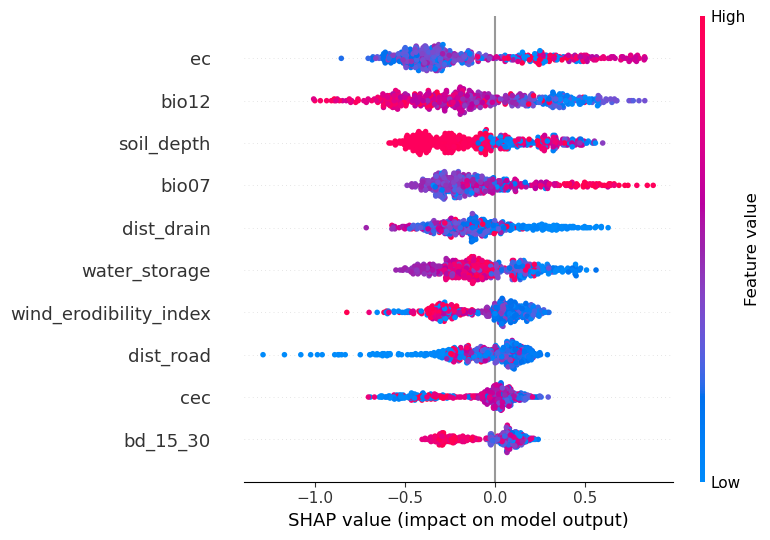

In [14]:
explainer = shap.TreeExplainer(stq_model_2)
shap_values = explainer.shap_values(X_test)
shap.TreeExplainer(stq_model_2).shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display = 10)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


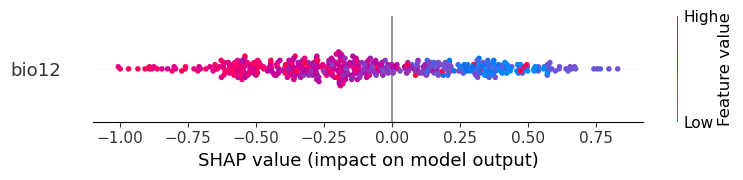

In [15]:
shap.summary_plot(shap_values[:,64:65], X_test.iloc[:, 64:65])

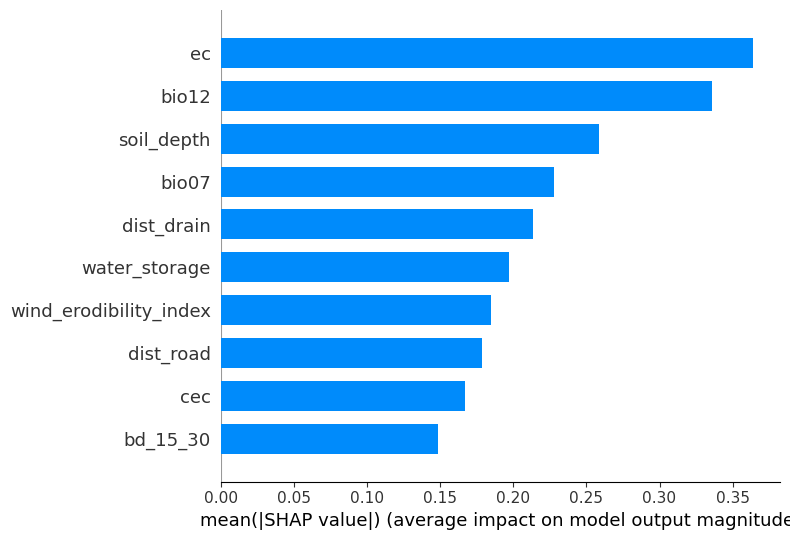

In [16]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10)

In [17]:
shap.initjs()

In [18]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [19]:
shap.force_plot(explainer.expected_value, shap_values[:500,:], X_test.iloc[:500,:])

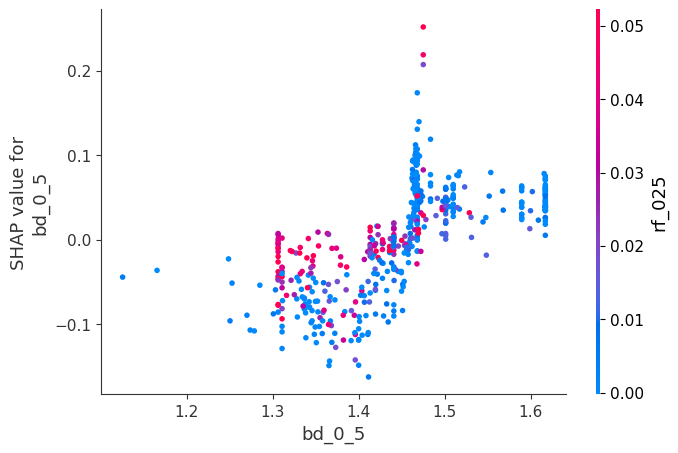

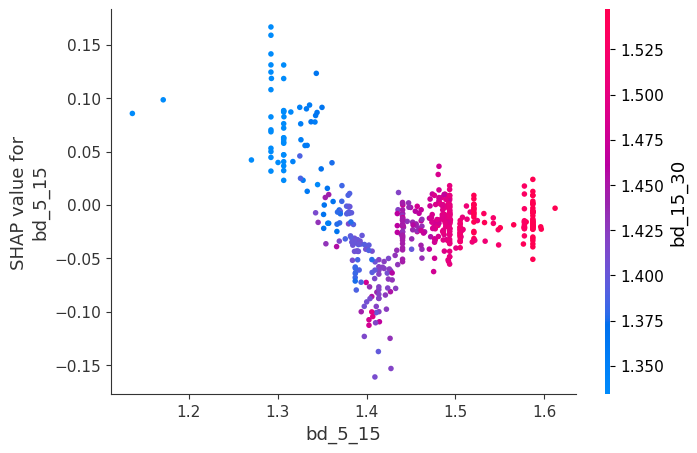

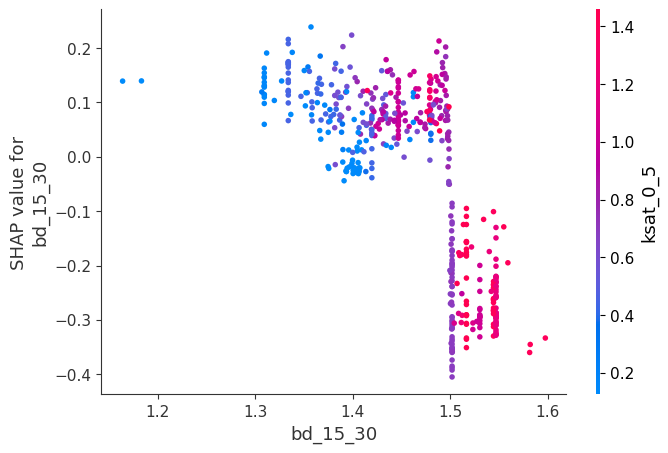

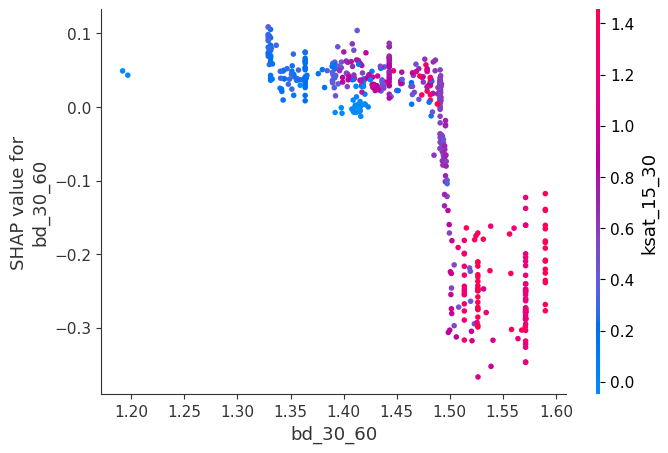

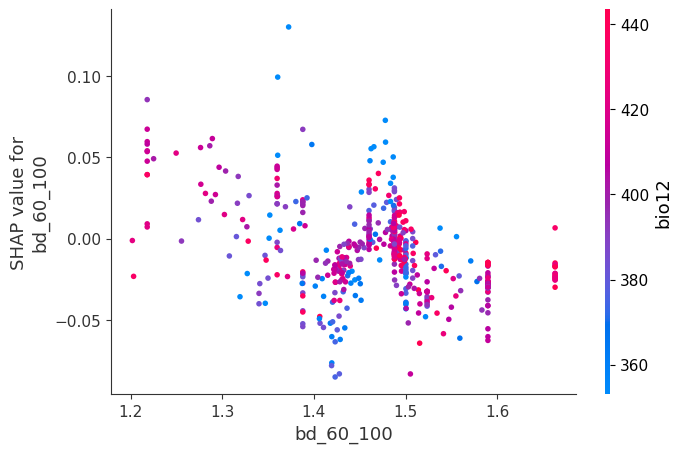

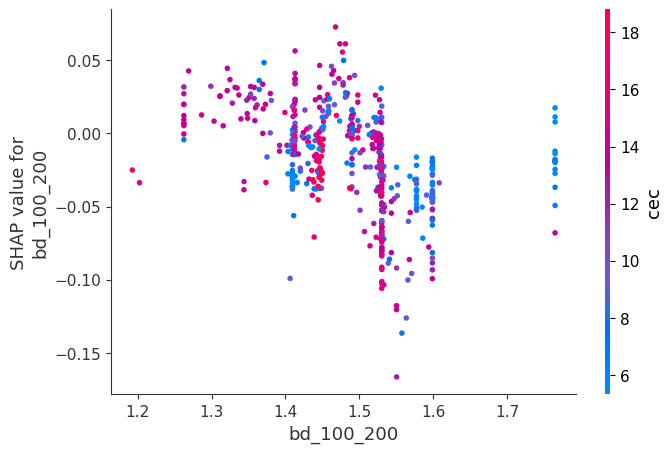

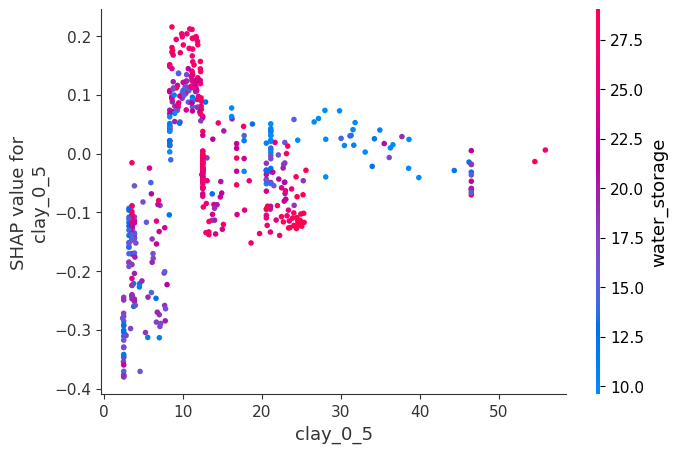

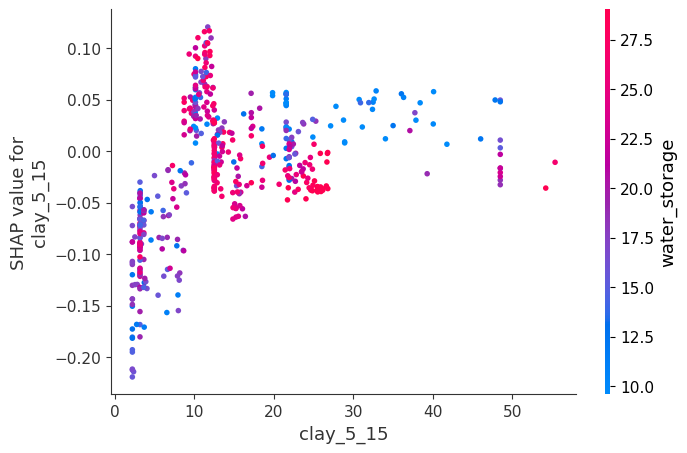

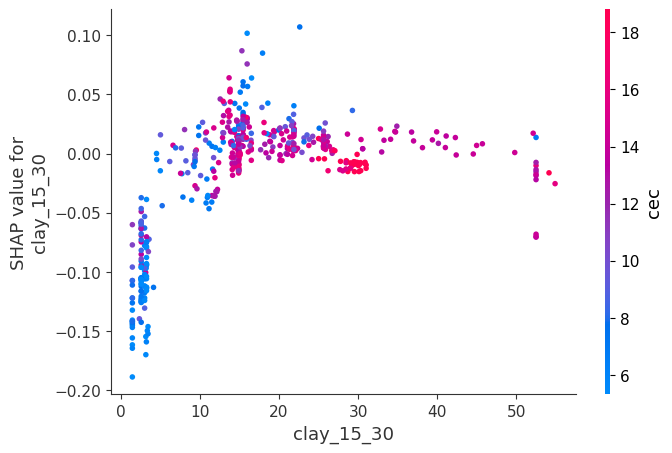

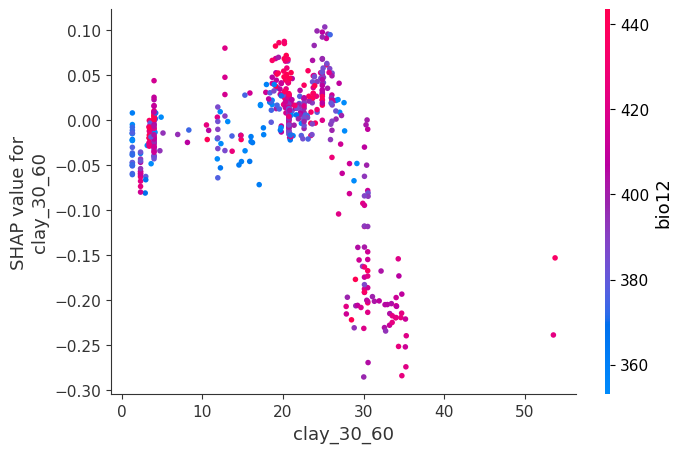

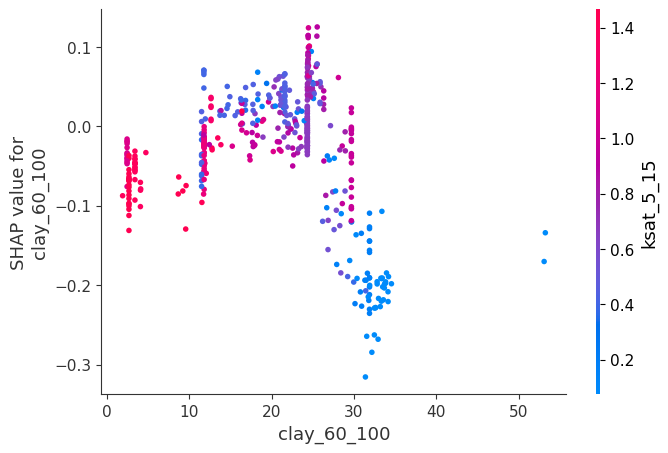

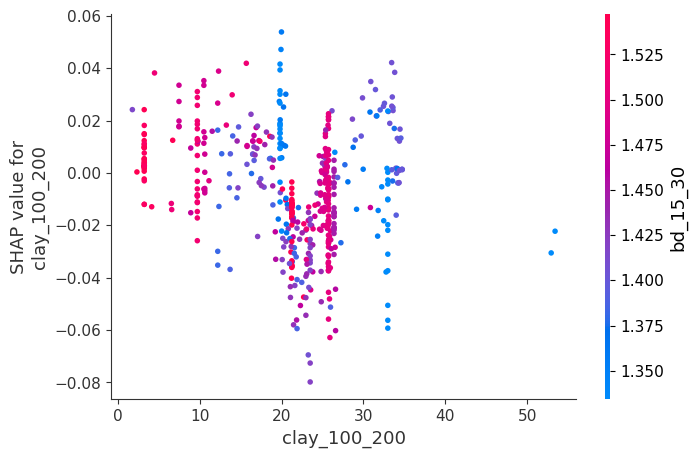

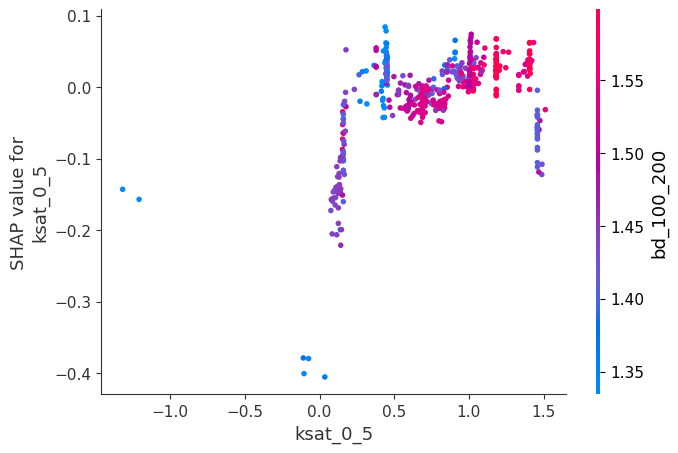

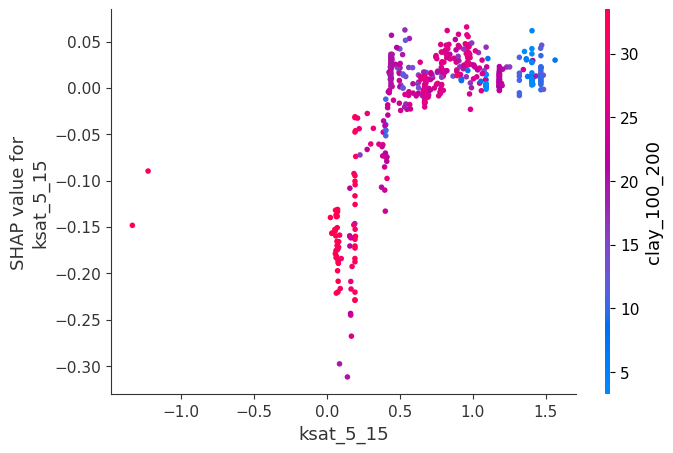

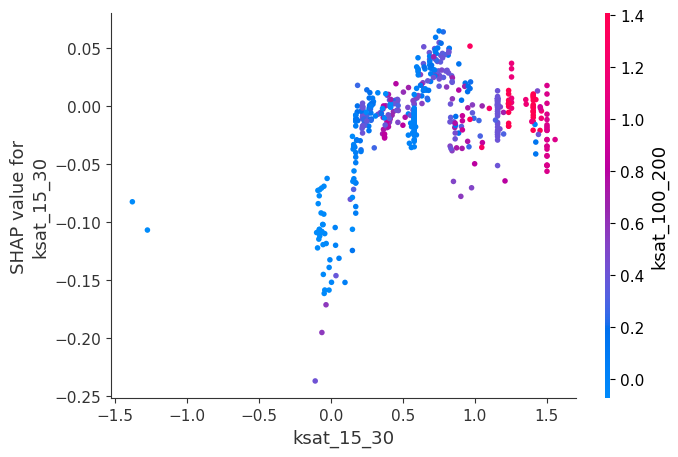

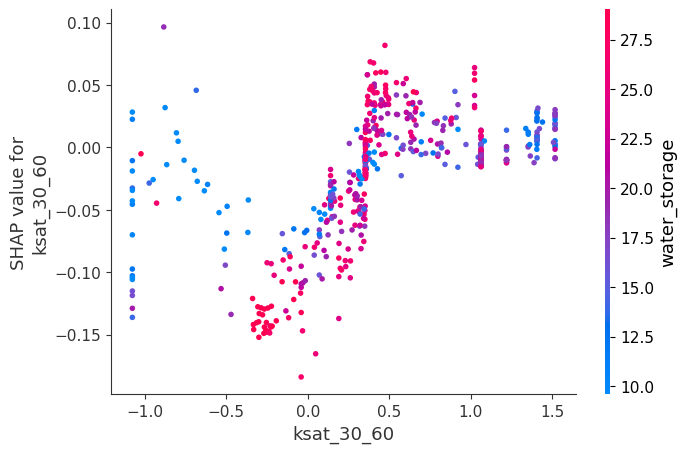

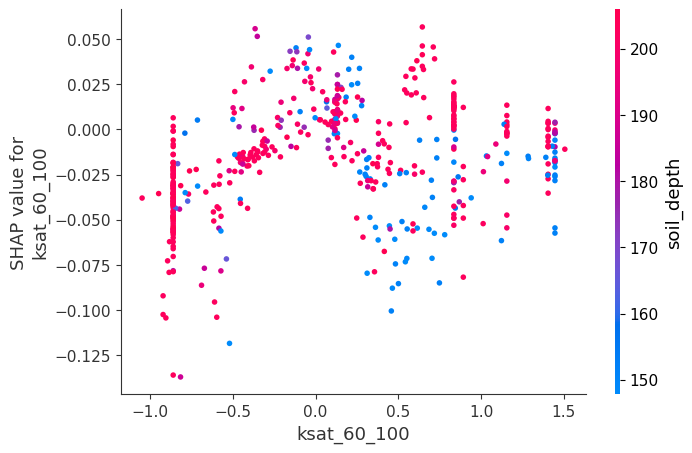

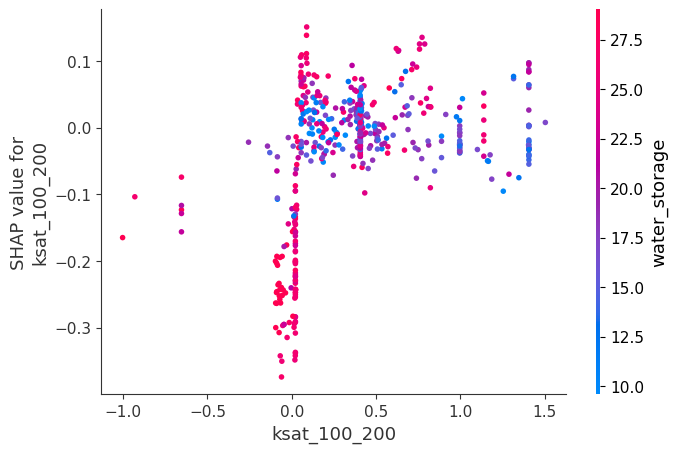

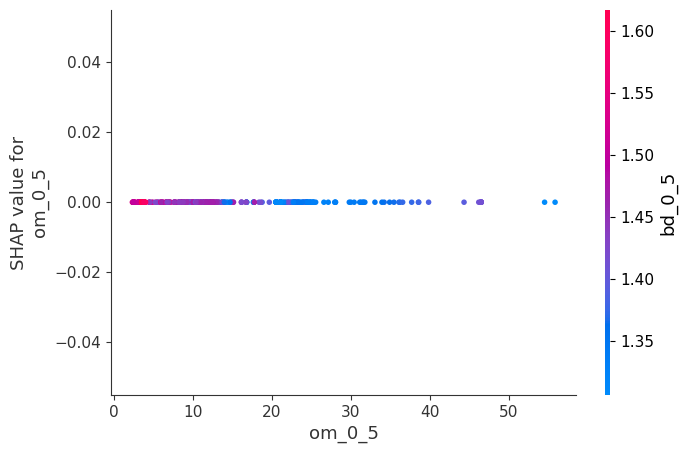

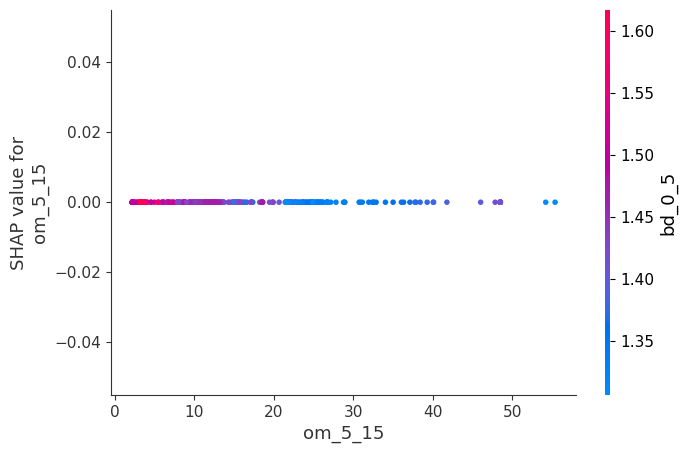

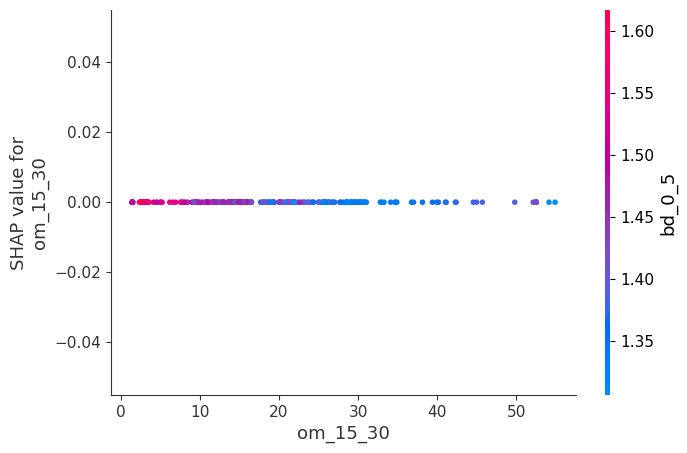

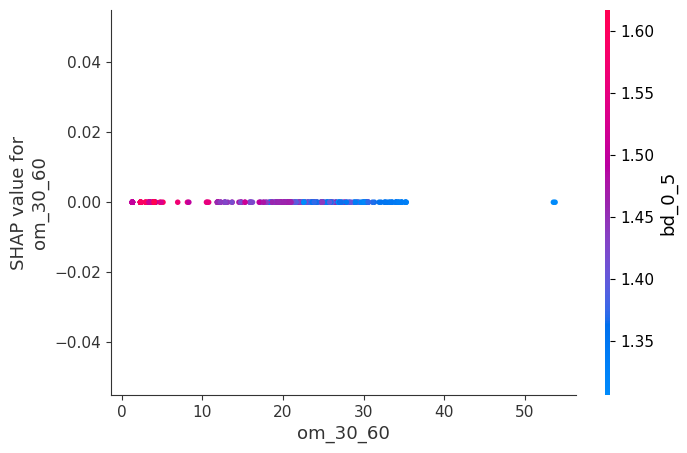

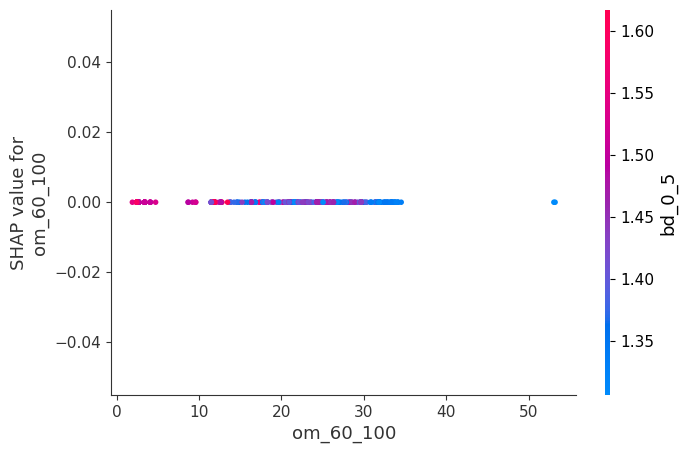

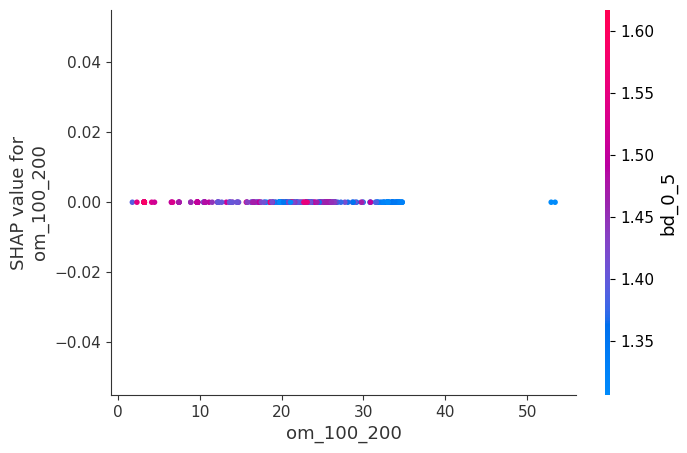

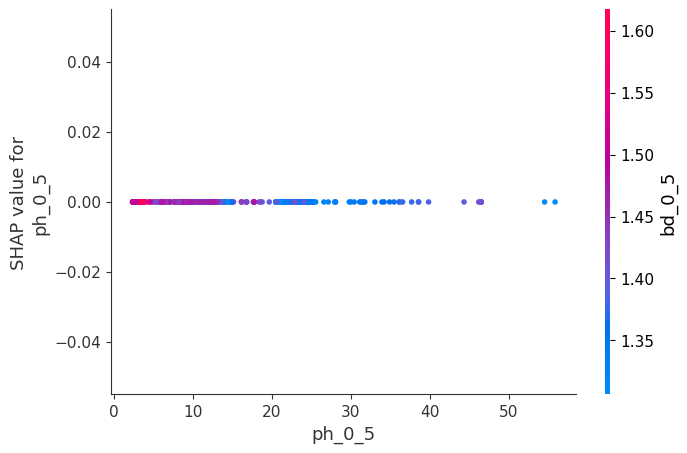

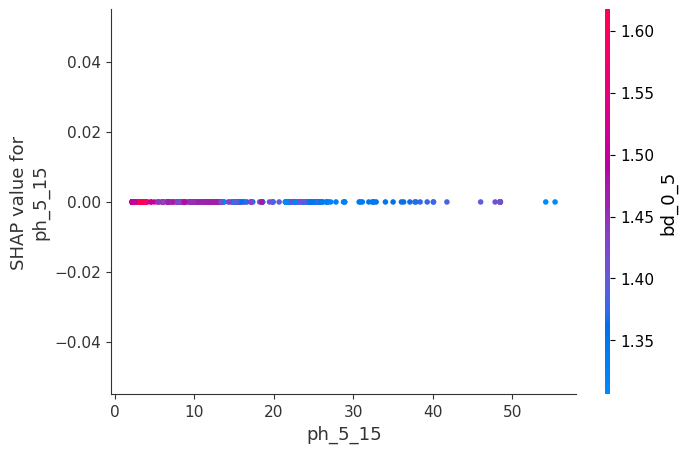

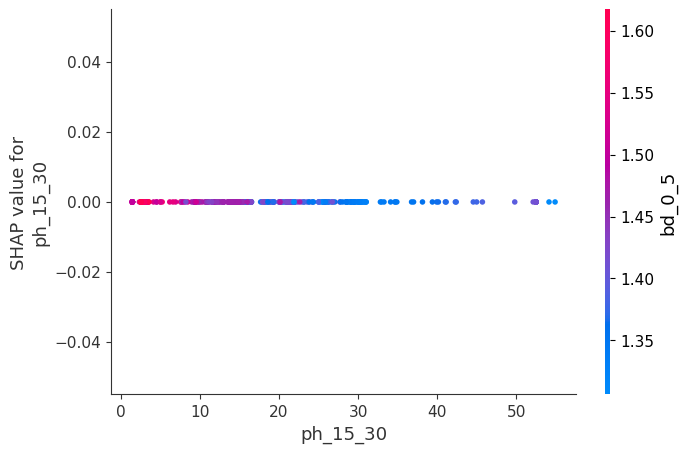

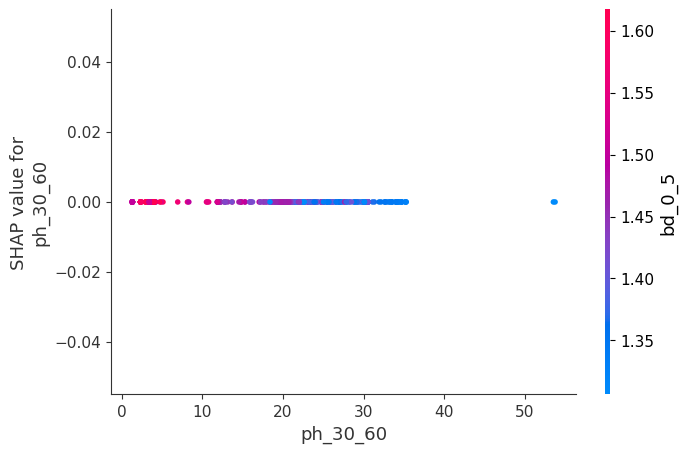

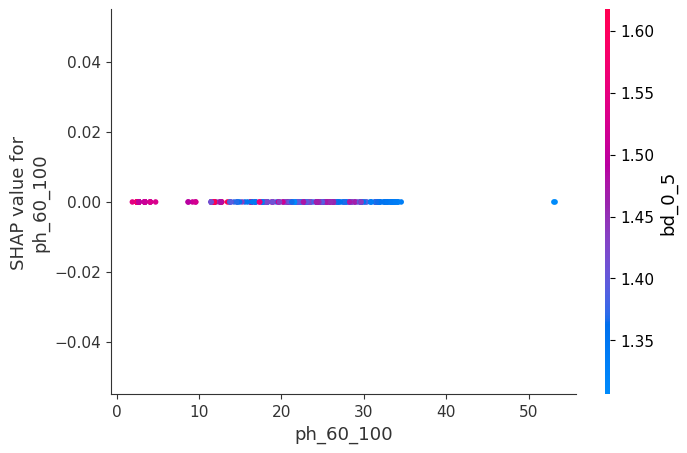

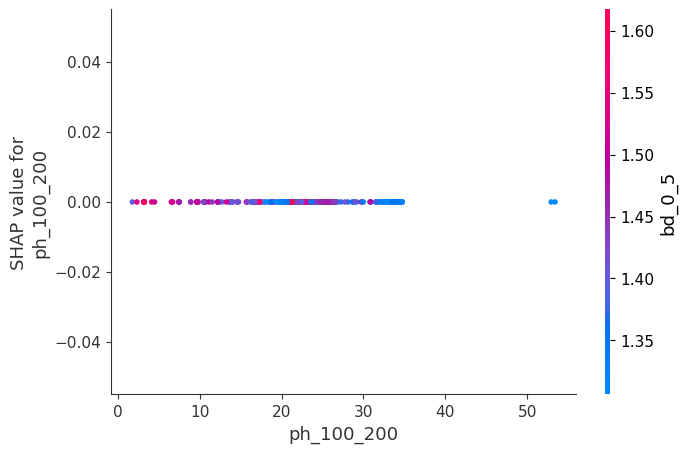

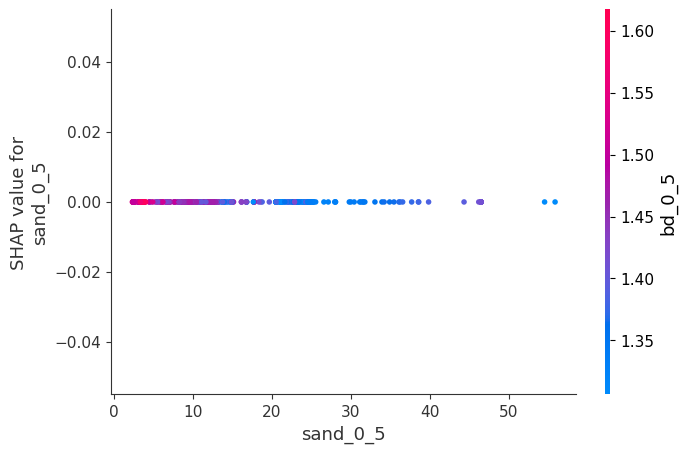

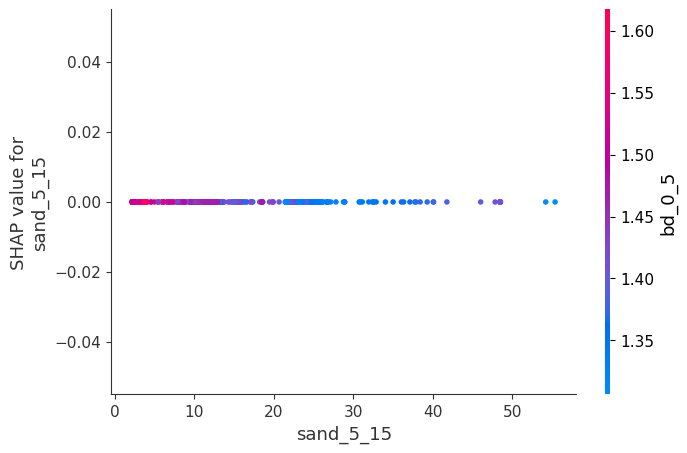

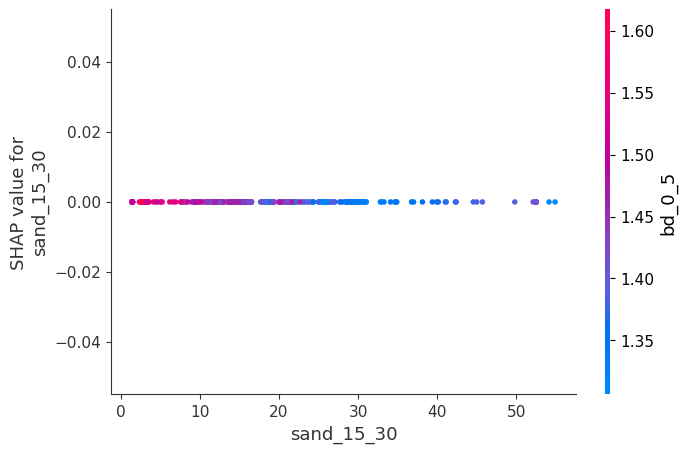

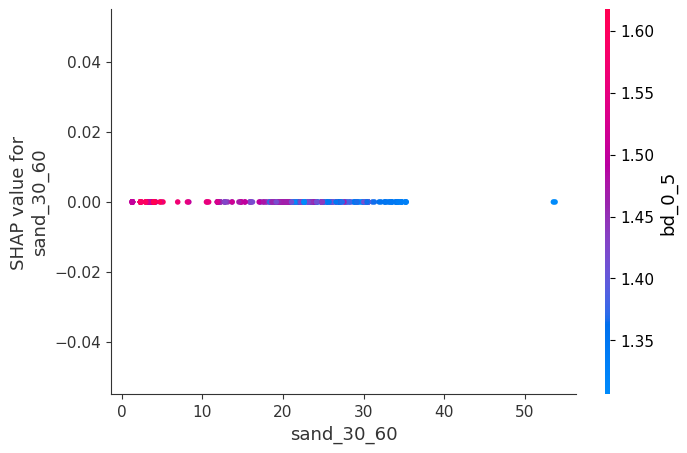

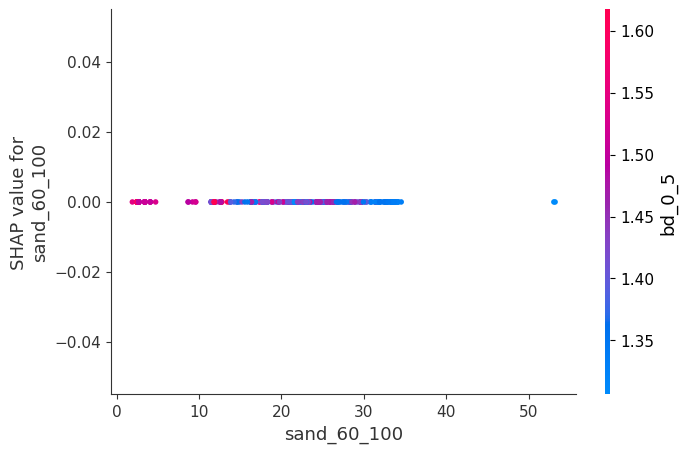

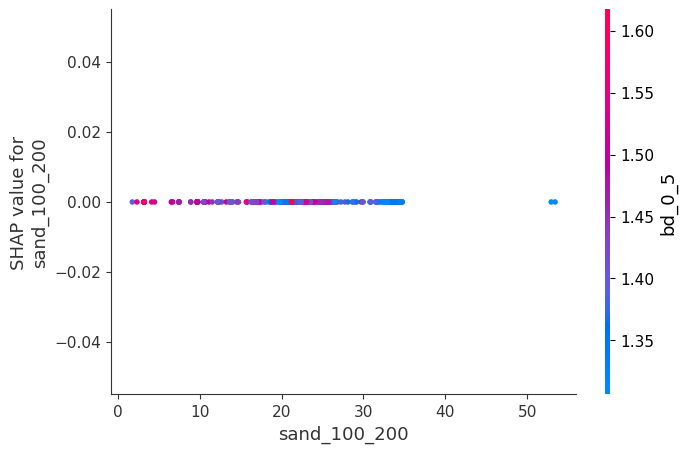

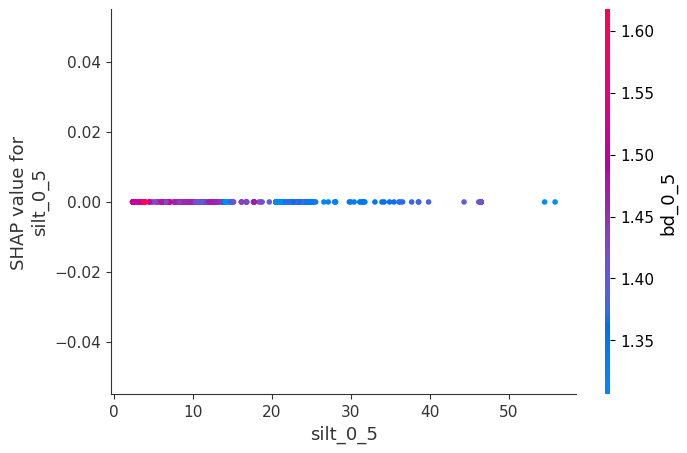

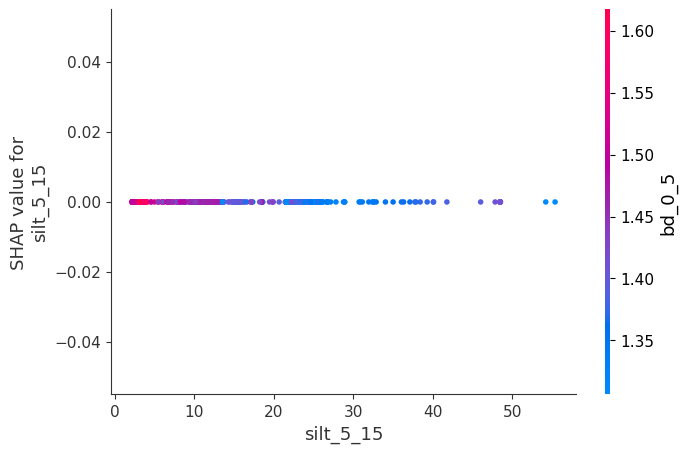

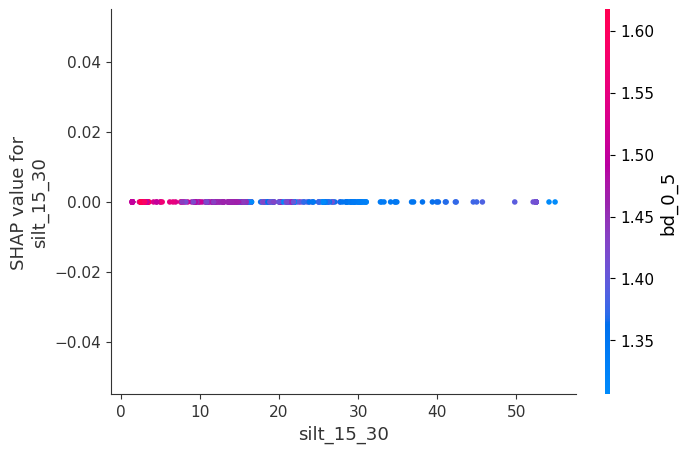

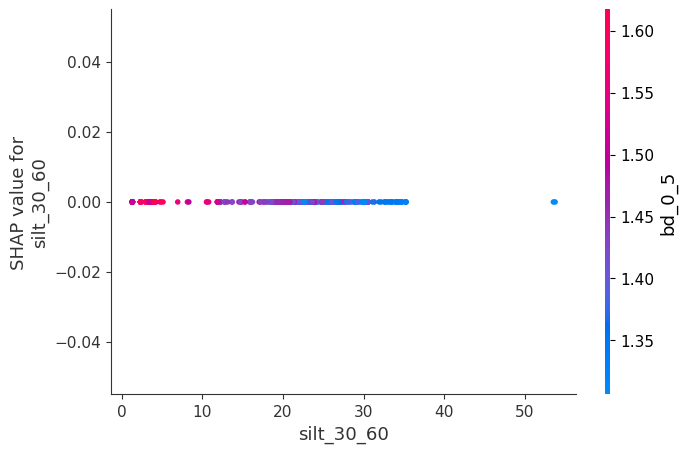

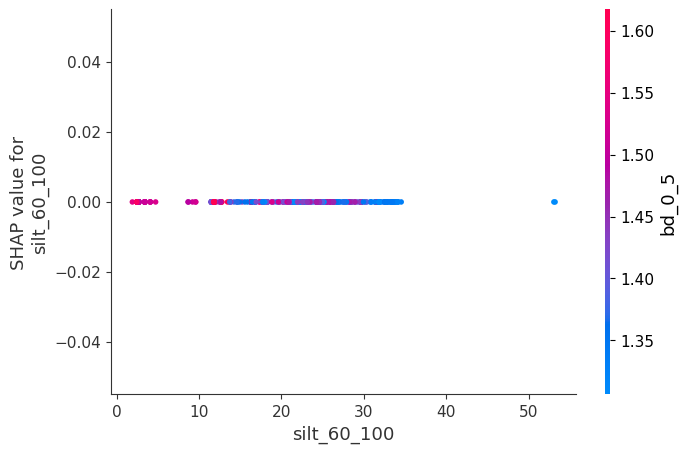

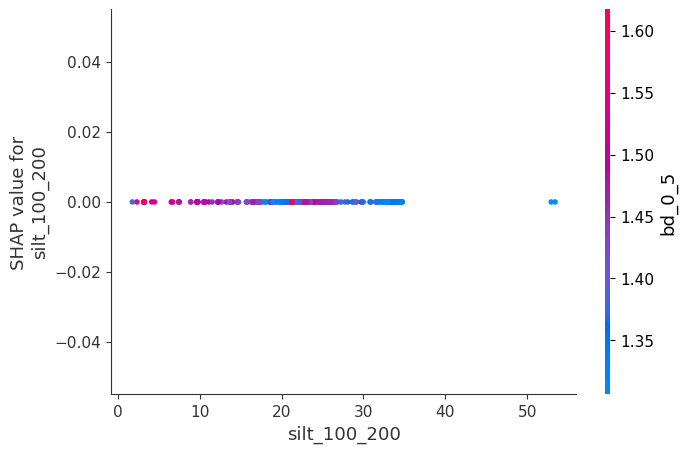

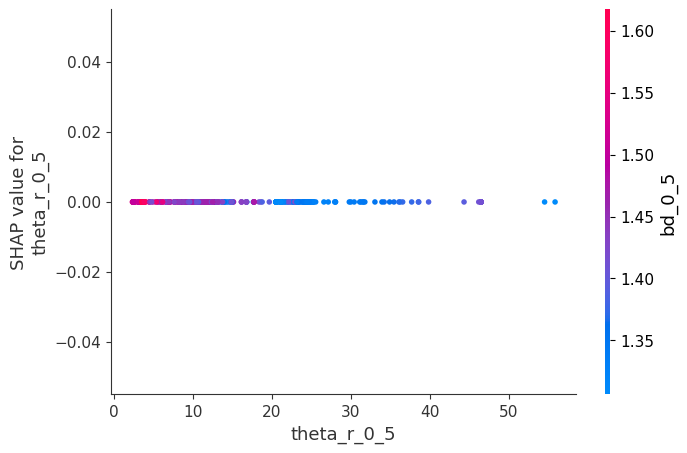

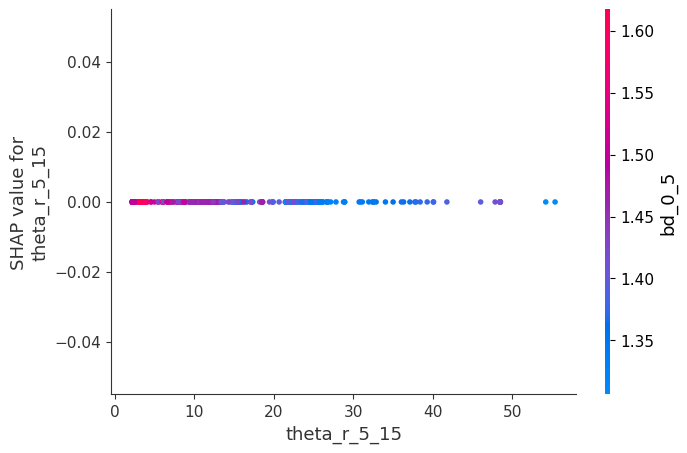

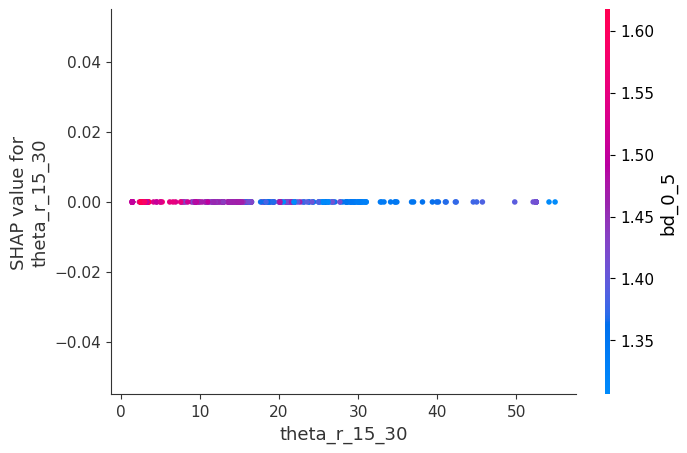

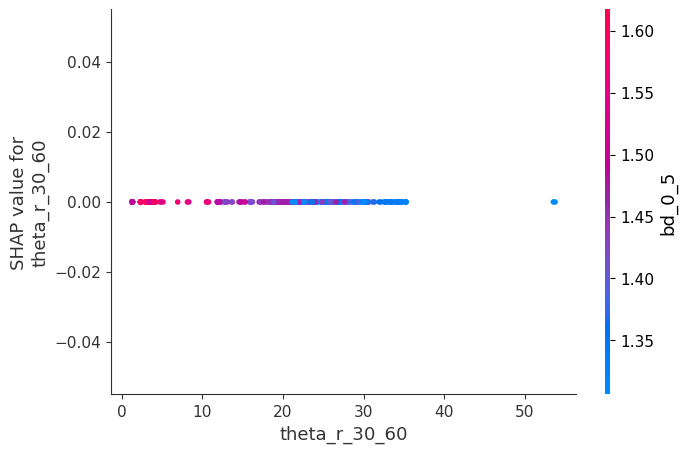

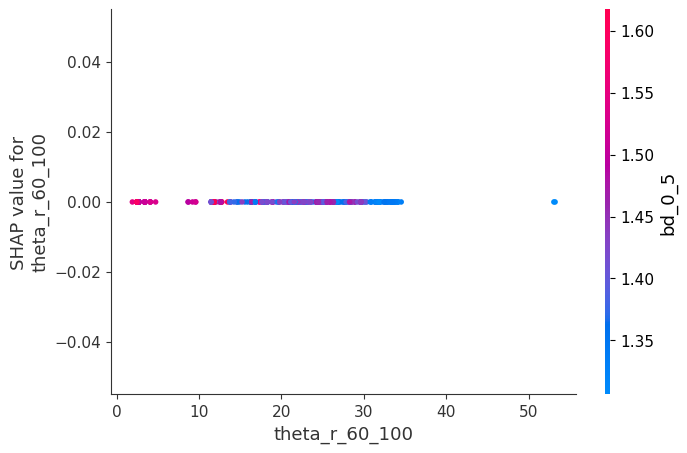

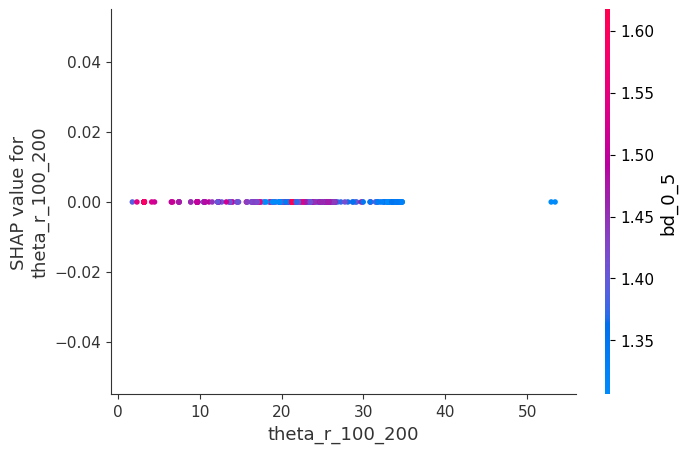

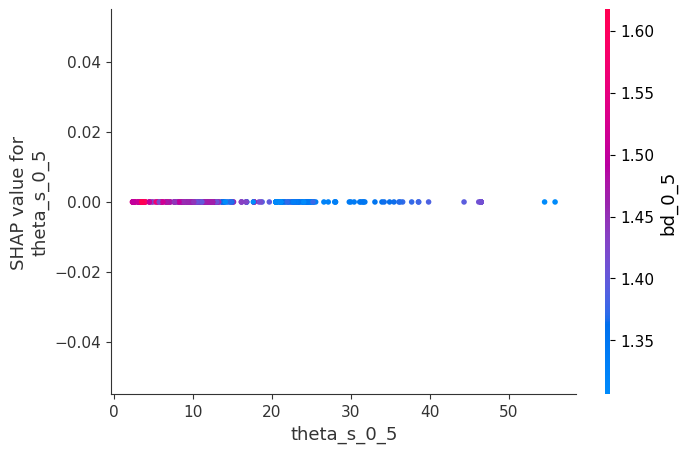

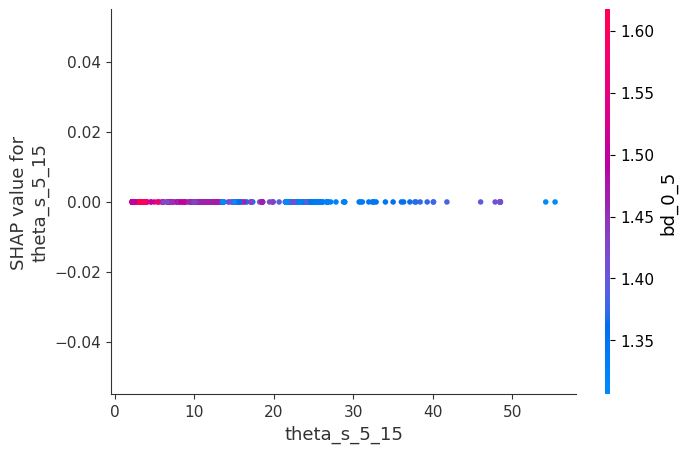

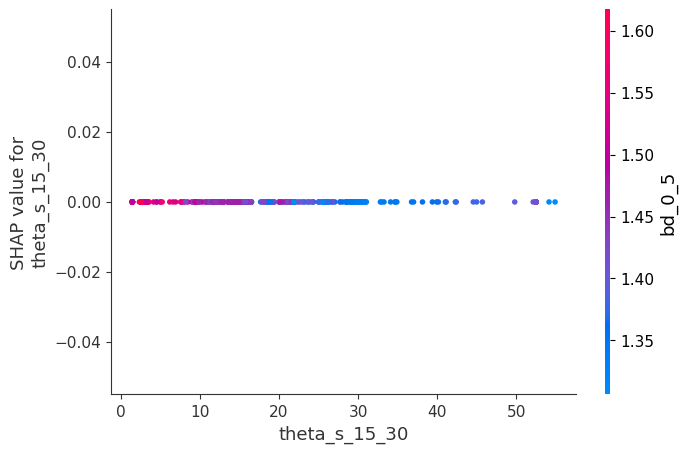

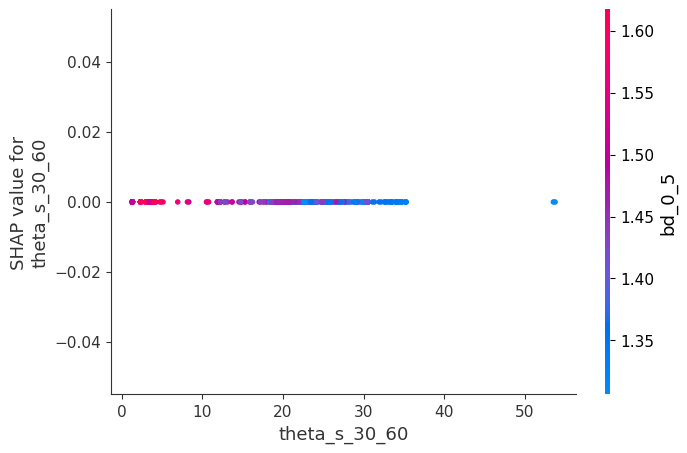

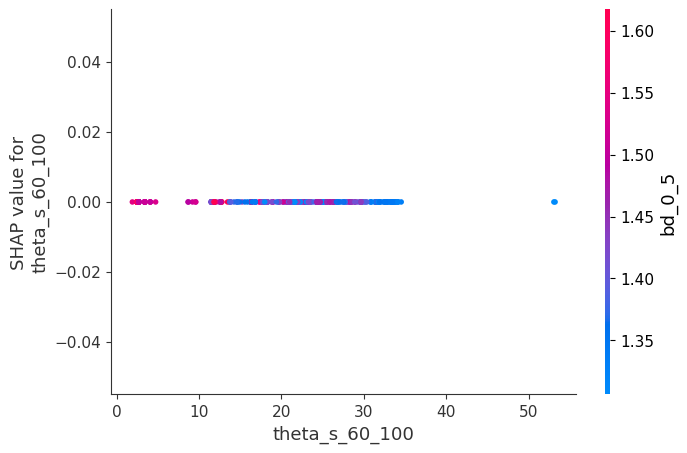

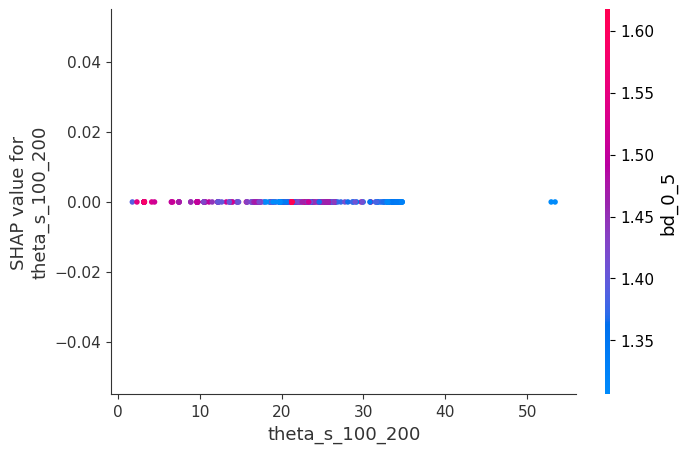

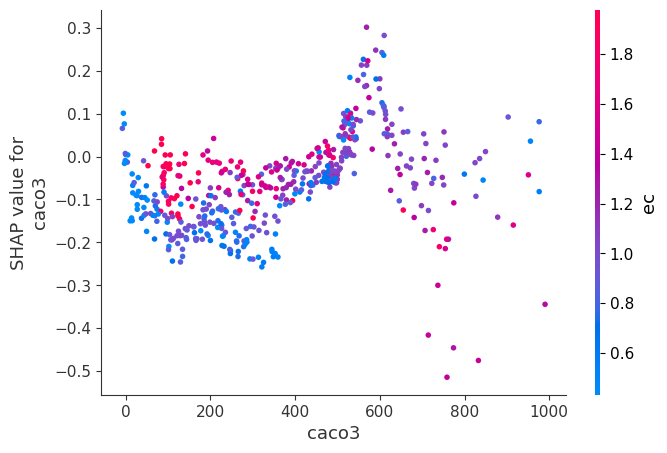

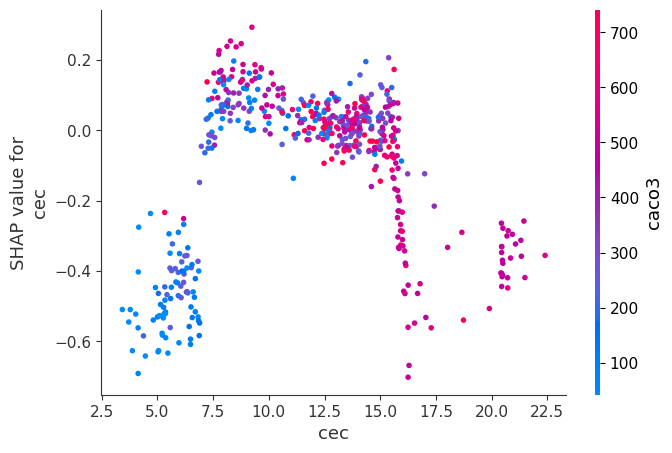

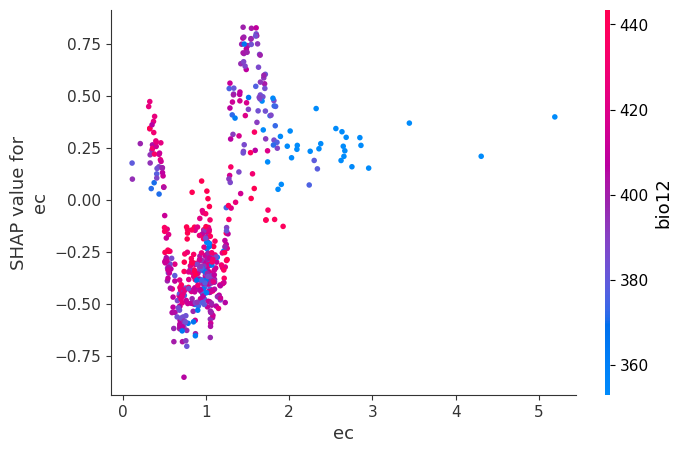

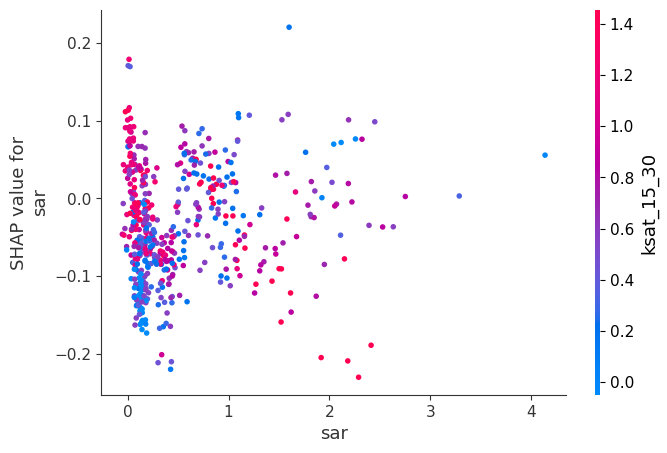

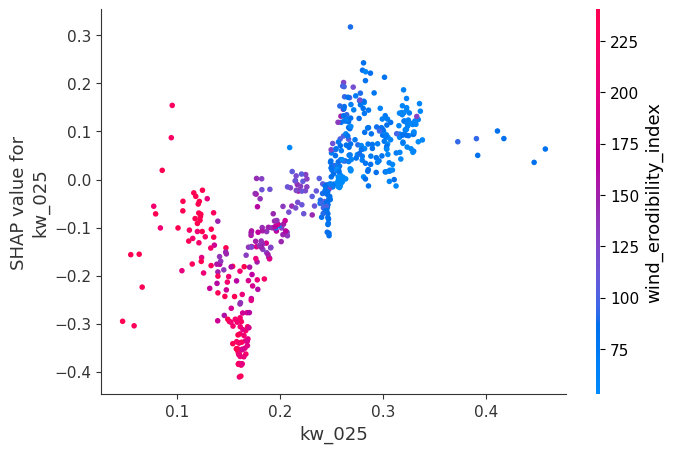

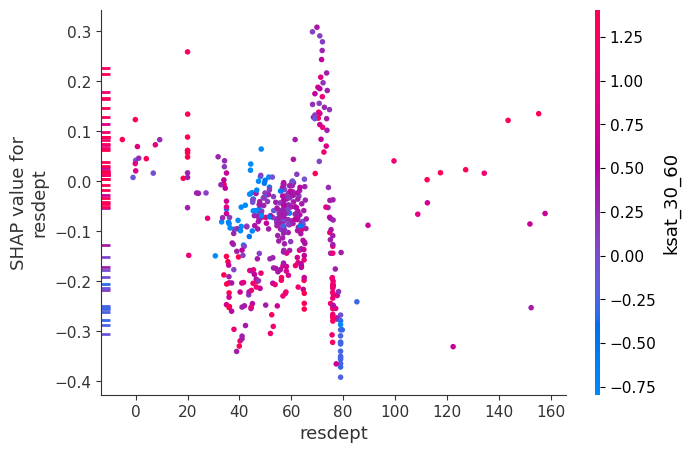

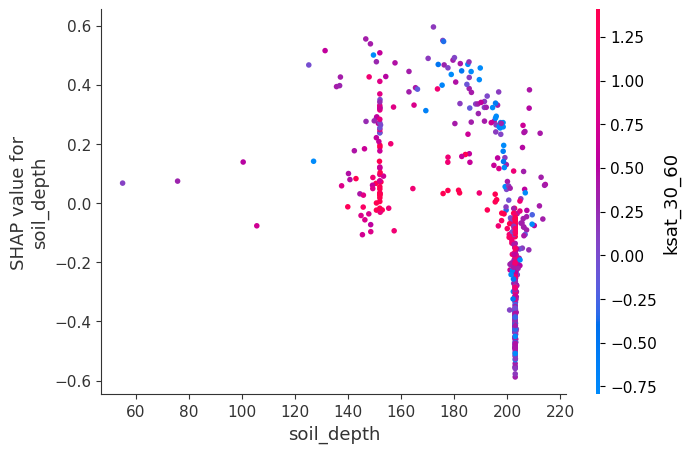

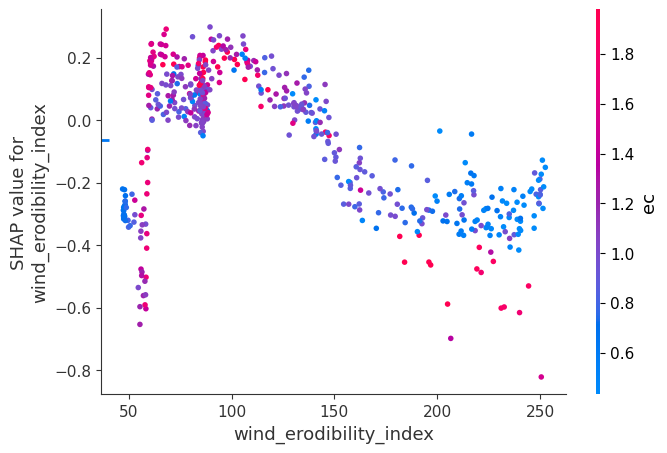

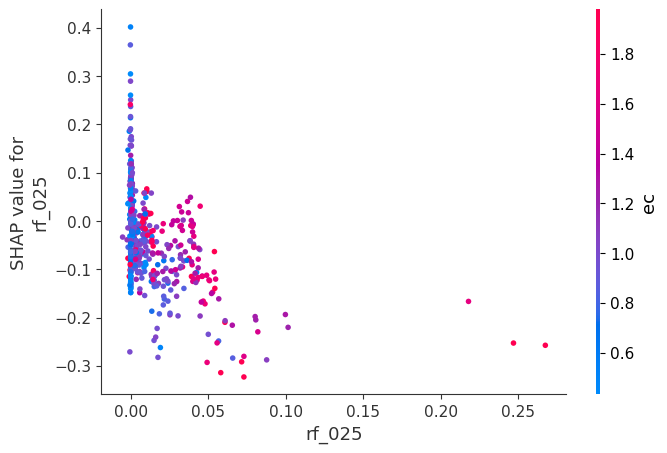

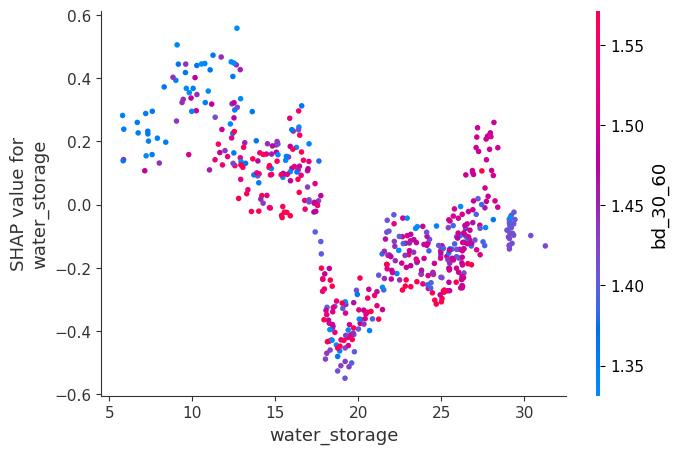

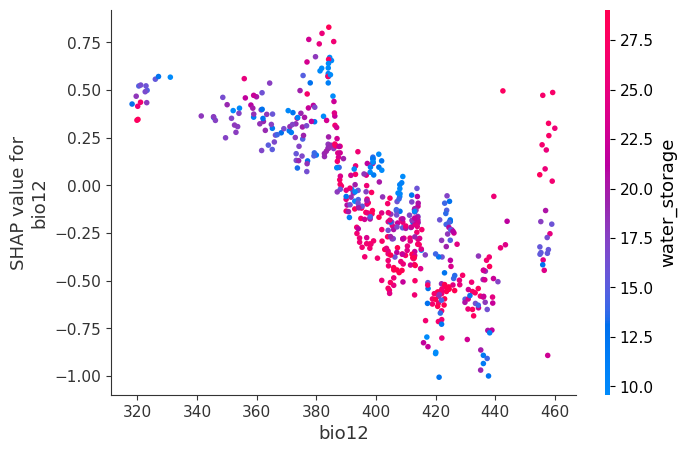

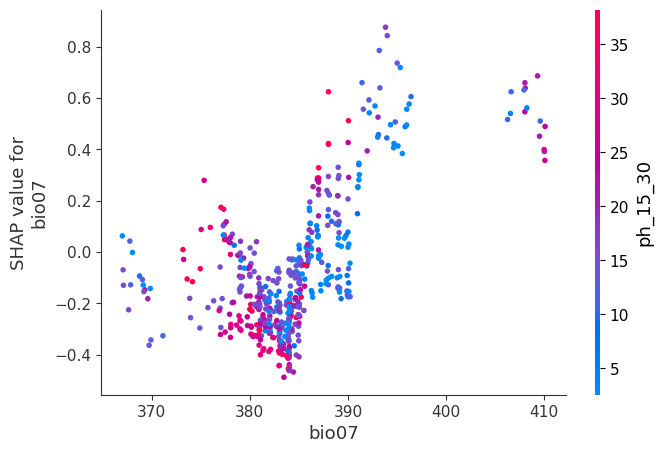

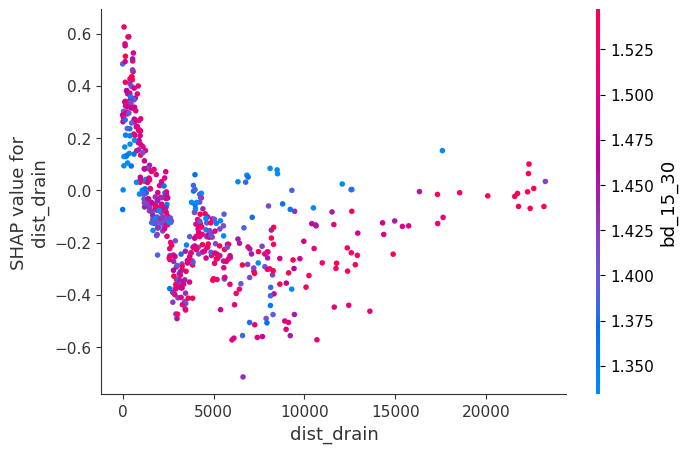

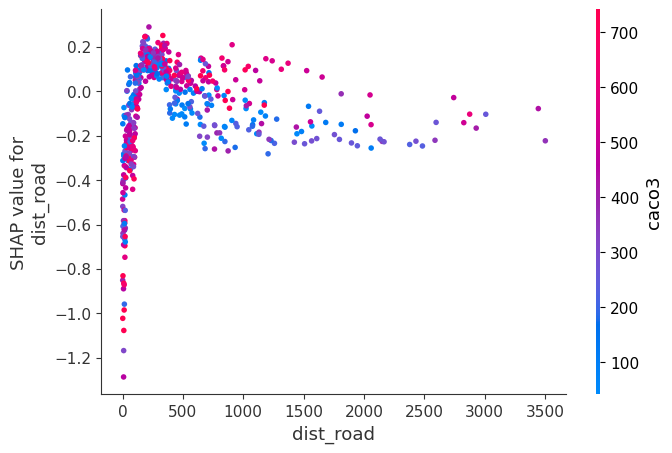

In [20]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_test, display_features=X_test)

In [21]:
explainer.expected_value

0.23583233

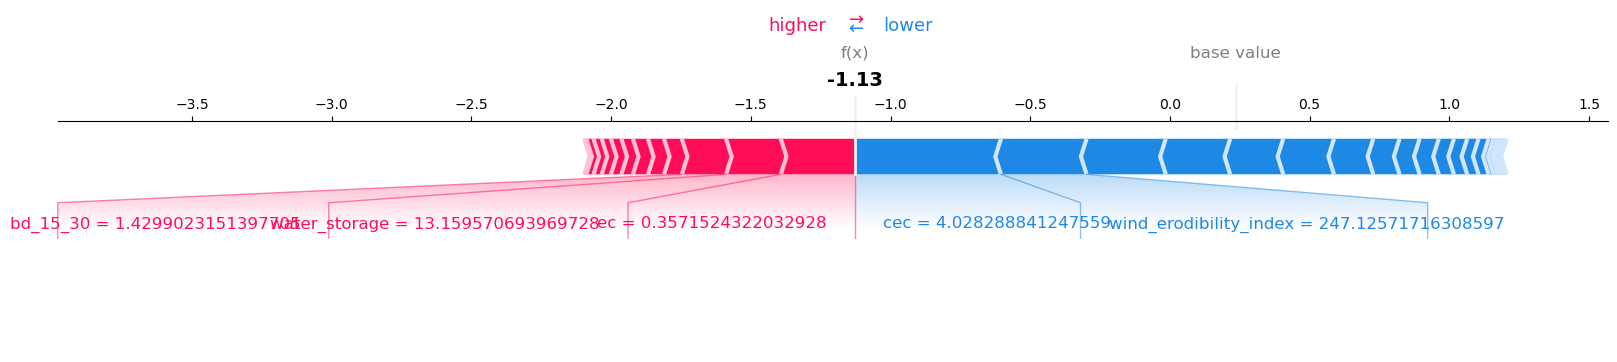

In [22]:
shap.plots.force(explainer.expected_value, shap_values[11,:], X_test.iloc[11, :], matplotlib = True) # can change to represent a row in the testing data

[14:13:49] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


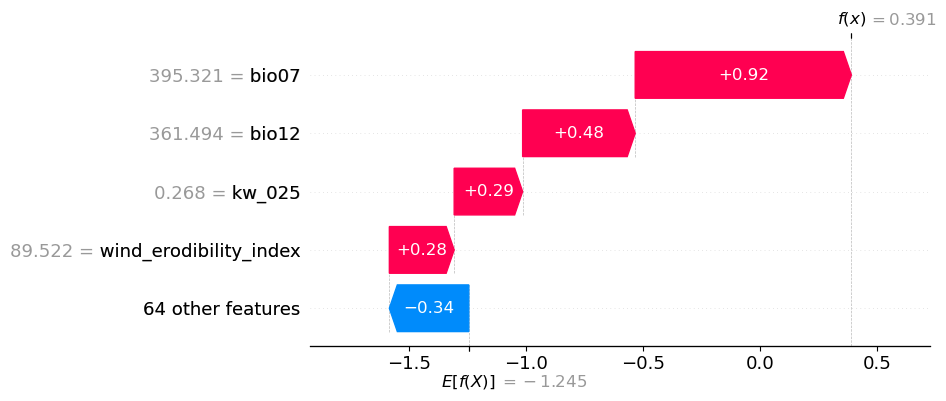

In [48]:
explainer2 = shap.Explainer(stq_model_2, X_test)
shap_values2 = explainer2(X_test)
shap.plots.waterfall(shap_values2[212], max_display = 5)

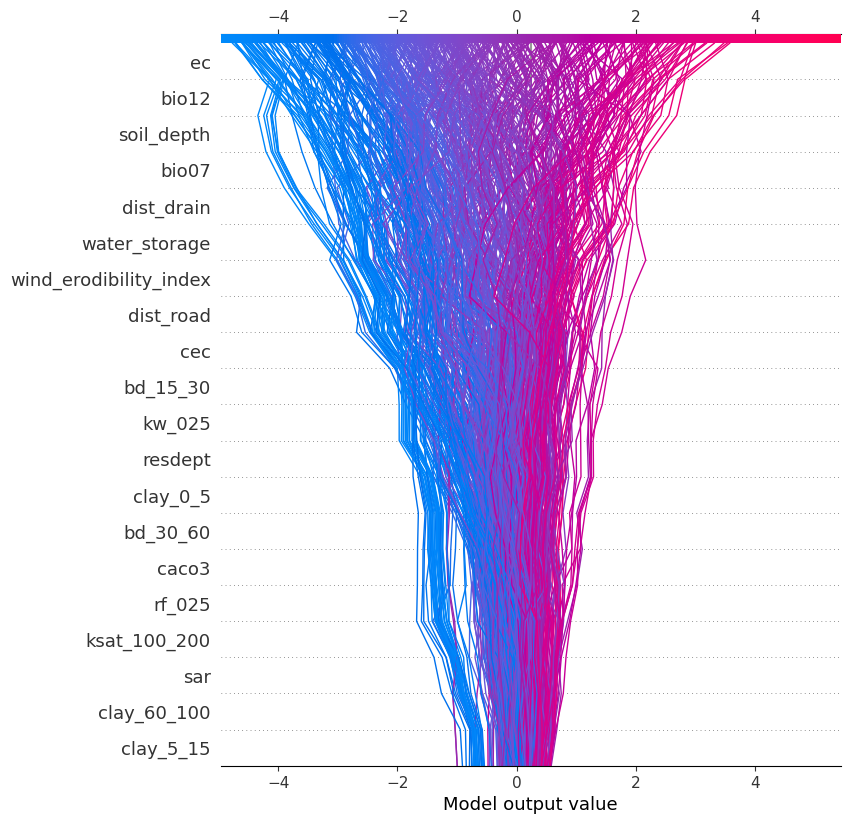

In [23]:
shap.decision_plot(explainer.expected_value, shap_values, X_test.columns)

# Testing a Random Forests model

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       442
           1       0.40      0.86      0.54        58

    accuracy                           0.83       500
   macro avg       0.69      0.85      0.72       500
weighted avg       0.91      0.83      0.86       500



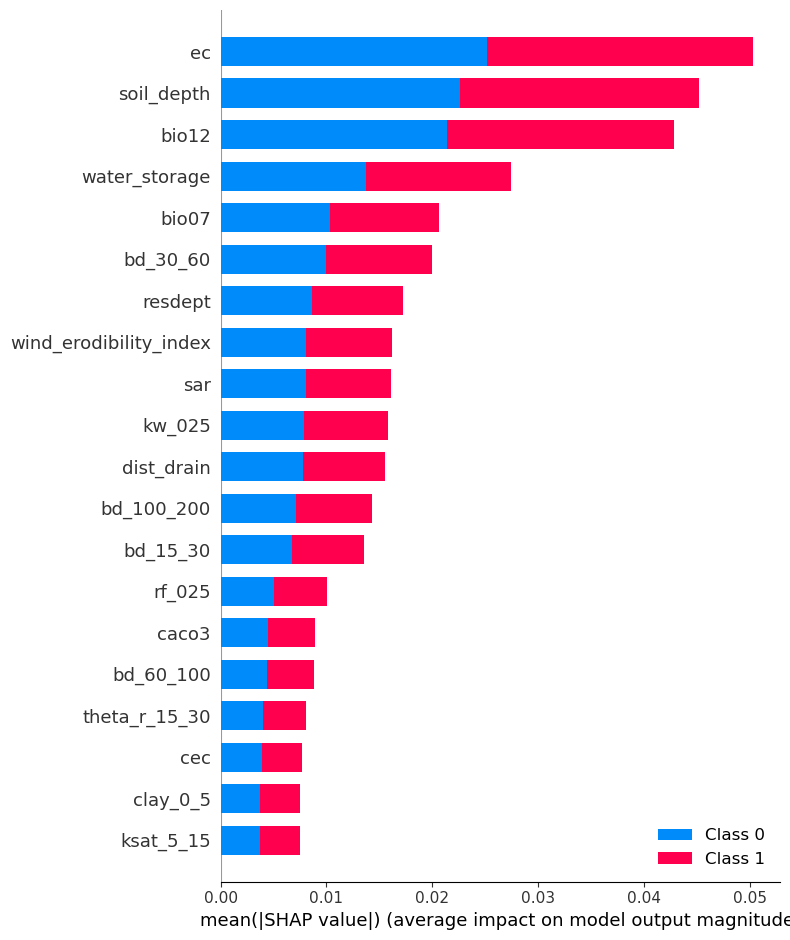

In [28]:
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

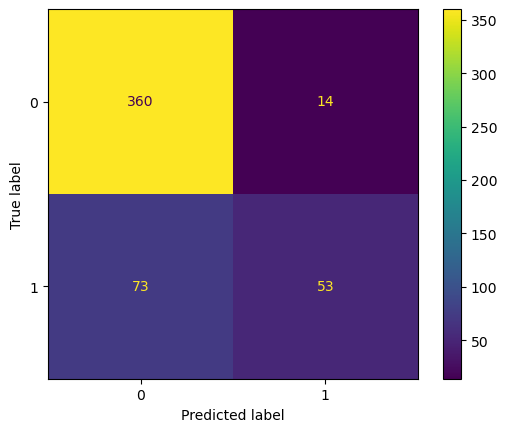

In [23]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)